# Comparing PNECs and SCLC archetypes

PNECs are like generalists that complete many different tasks sub-optimally. If each tumor cell can specialize in a single PNEC task, overall the tumor’s “group phenotypic composition” is more fit than if each individual cell tried to do all tasks. Because these are cancer cells, they are also more plastic than normal differentiated cells and are therefore better able to trade off tasks to increase the fitness of the whole tumor when appropriate.

1. Use GO terms corresponding to PNEC tasks to show that PNECs are marginally enriched in all of them, whereas different SCLC phenotypes are strongly enriched in a subset
2. Can this explain why a more heterogeneous tumor can better respond to treatment?

Do PNECs fall in an archetype space? Let's try to see if they DO have different tasks they optimize. If not, my guess is that its because they are doing multiple tasks ("suboptimally") until they acquire mutations that allow them to increase in fitness as cancer cells.

In [37]:
import scvelo as scv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc

In [14]:
pnec = pd.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/NE_stem/GSE136580_YO_MAK_082619_tpmTranscripts_withoutERCCs.txt',
                   sep = '\t', index_col = 0, header = 0)

In [15]:
pnec.index = [i.split(':')[0].upper() for i in pnec.index]

In [16]:
pnec = np.log2(pnec+1)

In [17]:
pnec_clusters = pd.read_table('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/NE_stem/metadata_cleaned.tsv', sep = '\t', index_col = 1)

In [18]:
pnec_clusters

,I.D.,Lineage label,Initial,Final,cluster
Long format cell I.D.,,,,,
A4_C49_022114_S5,1,Ascl1 (+),1,12,NE_ciliated
A6_C51_022114_S3,2,Ascl1 (+),1,2,NE
E9_C30_022114_S1,3,Ascl1 (+),1,17,NE
A9_C04_021715_IL6202_N701_N503_S4,5,Ascl1 (+),1,1,NE
C9_C16_021715_IL6202_N702_N501_S1,6,Ascl1 (+),2,2,NE
...,...,...,...,...,...
F9_C36_012015_IL6205_N706_N505_S45,243,Lyz2 (−),5,5,ciliated
G10_C90_012015_IL6205_N706_N508_S50,244,Lyz2 (−),3,3,club
G9_C42_012015_IL6205_N706_N507_S48,245,Lyz2 (−),5,5,ciliated


# CXCR4 and NEUROD1 in PNECs

In [19]:
pnec_clusters['CXCL12'] = pnec.loc['CXCL12'].mean()
pnec_clusters['CXCR4'] = pnec.loc['CXCR4']

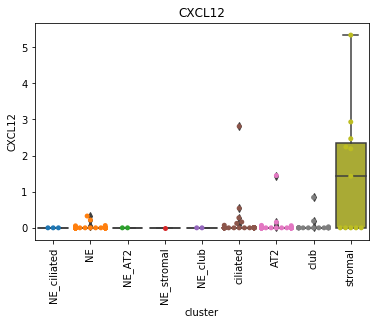

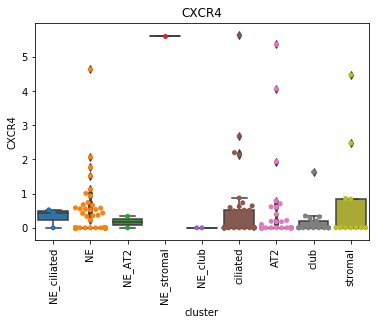

In [20]:
import seaborn as sns
gene = 'CXCL12'
def plot_box(gene):
    plt.figure(figsize=(6,4))
    # pnec_clusters[gene] = pnec.loc[gene]
    sns.boxplot(data = pnec_clusters, x = 'cluster', y = gene)
    sns.swarmplot(data = pnec_clusters, x = 'cluster', y = gene)
    plt.title(gene)
    plt.xticks(rotation = 90)
    plt.show()
plot_box(gene)
plot_box('CXCR4')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

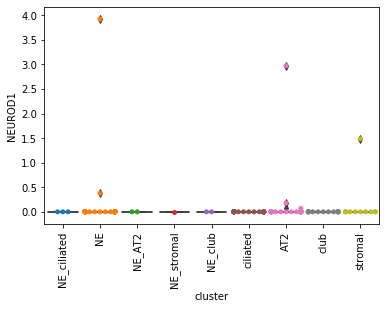

In [21]:
plt.figure(figsize=(6,4))
pnec_clusters['NEUROD1'] = pnec.loc['NEUROD1']
sns.boxplot(data = pnec_clusters, x = 'cluster', y = 'NEUROD1')
sns.swarmplot(data = pnec_clusters, x = 'cluster', y = 'NEUROD1')

plt.xticks(rotation = 90)

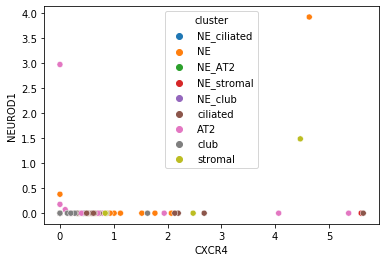

In [22]:
sns.scatterplot(x = pnec_clusters['CXCR4'], y = pnec_clusters['NEUROD1'], hue = pnec_clusters['cluster'])

# Transit amplifying cell signature vs. SCLC-Y

# GOSemSim tSNE plot on PNECs compared to SCLC Subtypes

In [23]:
# !git clone https://github.com/LoLab-VU/magine
# !cd magine
# !pip install -r requirements.txt
# !export PYTHONPATH=`pwd`:$PYTHONPATH

In [24]:
# from magine.enrichment.enrichr import Enrichr


In [25]:
pnec_ad = sc.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/NE_stem/GSE136580_YO_MAK_082619_tpmTranscripts_withoutERCCs.txt',
                   delimiter = '\t')
pnec_ad = pnec_ad.T                     
pnec_ad.obs['cluster'] = pnec_clusters['cluster']                  

In [26]:
NE_clust = []
for i in pnec_ad.obs_names:
    if pnec_clusters.loc[i]['cluster'] in ['NE_ciliated','NE_AT2','NE_club','NE_stromal']:
        NE_clust.append('TA')
    elif pnec_clusters.loc[i]['cluster'] == 'NE':
        NE_clust.append("NE")
    else: NE_clust.append("Non-NE")

In [27]:
pnec_ad.obs['NE_cluster'] = NE_clust
pnec_ad.var_names = [i.split(':')[0] for i in pnec_ad.var_names]


... storing 'cluster' as categorical
... storing 'NE_cluster' as categorical


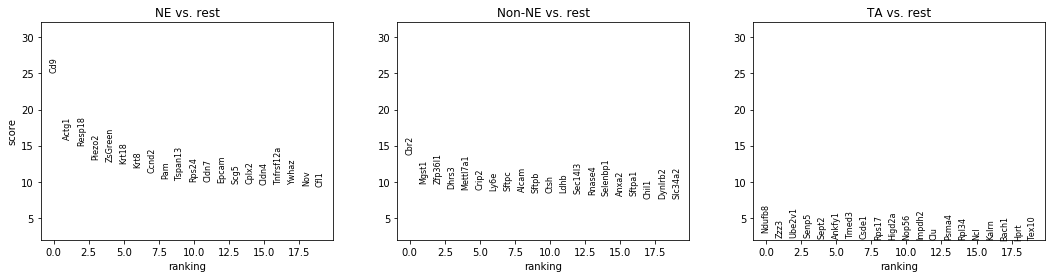

In [28]:
sc.tl.rank_genes_groups(pnec_ad, groupby='NE_cluster')
sc.pl.rank_genes_groups(pnec_ad)

In [29]:
ne_enrich = sc.queries.enrich(pnec_ad, "NE", org='mmusculus', gprofiler_kwargs={'sources':['GO:BP'],'all_results':True})

In [30]:
ne_enrich.loc[ne_enrich['significant']==True]

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:BP,GO:0006518,peptide metabolic process,1.262233e-27,True,"""The chemical reactions and pathways involving...",326,810,90,11240,0.111111,0.276074,query_1,"[GO:0043603, GO:1901564]"
1,GO:BP,GO:0043603,cellular amide metabolic process,2.185505e-27,True,"""The chemical reactions and pathways involving...",362,810,95,11240,0.117284,0.262431,query_1,[GO:0034641]
2,GO:BP,GO:0043604,amide biosynthetic process,3.745434e-22,True,"""The chemical reactions and pathways resulting...",283,810,76,11240,0.093827,0.268551,query_1,"[GO:0043603, GO:0044271]"
3,GO:BP,GO:0043043,peptide biosynthetic process,4.452167e-22,True,"""The chemical reactions and pathways resulting...",277,810,75,11240,0.092593,0.270758,query_1,"[GO:0006518, GO:0043604, GO:1901566]"
4,GO:BP,GO:0006412,translation,8.635260e-22,True,"""The cellular metabolic process in which a pro...",273,810,74,11240,0.091358,0.271062,query_1,"[GO:0010467, GO:0034645, GO:0043043, GO:0044267]"
5,GO:BP,GO:1901564,organonitrogen compound metabolic process,6.587912e-13,True,"""The chemical reactions and pathways involving...",2321,810,260,11240,0.320988,0.112021,query_1,"[GO:0006807, GO:0071704]"
6,GO:BP,GO:0044267,cellular protein metabolic process,1.617450e-11,True,"""The chemical reactions and pathways involving...",1460,810,180,11240,0.222222,0.123288,query_1,"[GO:0019538, GO:0044260]"
7,GO:BP,GO:1901566,organonitrogen compound biosynthetic process,2.756295e-11,True,"""The chemical reactions and pathways resulting...",558,810,91,11240,0.112346,0.163082,query_1,"[GO:1901564, GO:1901576]"
8,GO:BP,GO:0019538,protein metabolic process,1.250926e-08,True,"""The chemical reactions and pathways involving...",1941,810,212,11240,0.261728,0.109222,query_1,"[GO:0043170, GO:0044238, GO:1901564]"
9,GO:BP,GO:0007017,microtubule-based process,8.838049e-07,True,"""Any cellular process that depends upon or alt...",214,810,42,11240,0.051852,0.196262,query_1,[GO:0009987]


# Airway Epithelium

In [31]:
airway = sc.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/airway_epithelium/trachea_10x_log2TPM.txt', delimiter= '\t')

In [32]:
airway = airway.T

In [33]:
airway.var_names = [i.upper() for i in airway.var_names]

In [34]:
airway_cluster = pd.read_csv('/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC_data/airway_epithelium/trachea_10x_metadata.txt', sep = '\t', index_col=0)
airway_cluster = airway_cluster.drop('TYPE')

In [35]:
airway.obs['cluster'] = airway_cluster['cluster']

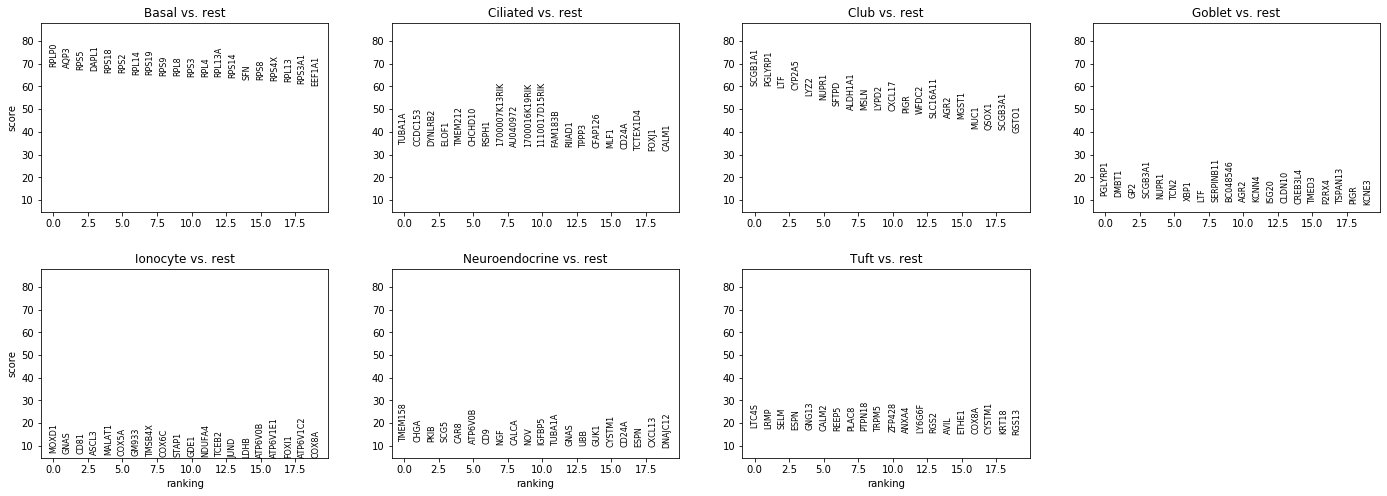

In [39]:
sc.tl.rank_genes_groups(airway, groupby='cluster', method='wilcoxon')
sc.pl.rank_genes_groups(airway)

In [50]:
# [print(i) for i in list(airway.uns['rank_genes_groups']['names']['Tuft'])[:400]]

#     enrich = sc.queries.enrich(airway, name, org='hsapiens', gprofiler_kwargs={'sources':['GO:BP'],'all_results':True})
    

In [ ]:
# x = 0
# for i in airway.uns['rank_genes_groups']['names']['Neuroendocrine']:
#     print(i) 
#     if x == 400: break
#     x += 1
    

In [52]:
df = pd.DataFrame(index=["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft','ont','name','level'])
categories = {'b':'BP','c':'CL','m':'MF'}

for m in df.index[:-3]:
    indf = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/%s_ontology.tab"%m, delimiter="\t")
#    indf = indf.loc[indf['q-value'] < 0.05]
    for i in indf.index:
        goid = indf.loc[i,'term_goid']
        if goid not in df.columns:
            df[goid]=False
            df.loc['ont',goid]= categories[indf.loc[i,'term_category']]
            df.loc['name',goid]= indf.loc[i,'term_name']
            df.loc['level',goid]= indf.loc[i,'term_level']
        df.loc[m,goid]=True
        



df = df.transpose()
df.to_csv("all_go_phenotypes.csv")

In [86]:
%load_ext rpy2.ipython

In [ ]:
%%R
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("GOSemSim")
library(GOSemSim)





In [ ]:
df = enrich[['native','name','significant']]
df.index = df['native']
df = df.drop('native',axis = 1)

In [ ]:
%%R -i df

tmp.go.data <- godata('org.Hs.eg.db', ont="BP", computeIC=TRUE)


#dff <- subset(df, (NE=="True" | MLH=="True") & ont=='BP')
#dff <- subset(df, ont=='BP' & (level==2 | level==3))
dff <- subset(df, significant=='True')



d <- mgoSim(row.names(dff),row.names(dff),semData=tmp.go.data,measure="Rel",combine=NULL)

# d[is.na(d)] <- 0
d <- 1-d

colnames(d) <- row.names(dff)#$name
row.names(d) <- row.names(dff)#$name


# Airway epithelium compared to SCLC subtypes

## Using bulk SCLC and upregulated genes

In [38]:
import os.path as op
outdir = '/Users/smgroves/Dropbox (VU Basic Sciences)/pycharm_workspace/mazebox/mazebox/examples/notebooks/bulk/'
data = pd.read_csv(op.join(outdir,'arc_space/SCLC_combined_Minna_CCLE_batch_corrected_wo_lowgenes.csv'), header = 0, index_col=0)
data = data.T

In [39]:
gene_all = pd.read_csv('./arc_space/Supplemental Table 5_enriched genes.csv', header = 0, index_col = None)


In [40]:
gene_pval = gene_all.pivot(index = 'Feature Name', columns='archetype #', values = 'P value (Mann-Whitney)')


In [41]:
gene_pval.sort_values(4)

archetype #,1,2,3,4,5
Feature Name,,,,,
RAB20,NaN,NaN,NaN,1.987300e-07,NaN
CLNK,NaN,NaN,NaN,2.512200e-07,NaN
LRRIQ4,NaN,NaN,NaN,2.757800e-07,NaN
IL17REL,NaN,NaN,NaN,2.889100e-07,NaN
CNKSR3,NaN,NaN,NaN,3.026400e-07,NaN
...,...,...,...,...,...
ZW10,NaN,0.019739,NaN,NaN,NaN
ZWILCH,8.794400e-03,NaN,NaN,NaN,NaN
ZYG11A,9.256000e-03,NaN,NaN,NaN,NaN


In [42]:
gene_all.loc[gene_all['archetype #']==3]

,archetype #,Feature Name,P value (Mann-Whitney),Median Difference,Mean Difference,Significant after Benjamini-Hochberg correction?,Is first bin maximal?
4399,3,PPP1R17,2.170200e-06,7.230200,4.985000,1,1
4400,3,NEUROD1,1.725000e-07,6.984300,5.842100,1,1
4401,3,MYC,4.171600e-03,5.654100,3.000200,1,1
4402,3,ELN,5.066400e-04,5.500900,3.123900,1,1
4403,3,CERKL,2.287900e-07,5.208500,4.256300,1,1
...,...,...,...,...,...,...,...
6249,3,KCNG4,6.431700e-03,0.004214,0.319500,1,1
6250,3,SPZ1,1.282000e-02,0.003859,0.154210,1,1
6251,3,HSD11B1,2.268000e-02,0.002758,0.013093,1,1
6252,3,BANF2,1.132600e-02,0.000476,0.247010,1,1


In [43]:
# gene_pval.loc[np.isfinite(gene_pval.sort_values(4)).loc[np.isfinite(gene_pval.sort_values(4))[4]==True].index]

**Use top 400 genes in Consensus Path DB to generate tab files**

In [255]:
df = pd.DataFrame(index=["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft','SCLC-A_arc','SCLC-A2_arc','SCLC-N_arc',
                         'SCLC-P_arc','SCLC-Y_arc','terms','ont','name','level'])

categories = {'b':'BP','c':'CL','m':'MF'}

for m in df.index[:-4]:
    indf = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/%s_ontology.tab"%m, delimiter="\t")
#    indf = indf.loc[indf['q-value'] < 0.05]
    for i in indf.index:
        goid = indf.loc[i,'term_goid']
        if goid not in df.columns:
            df[goid]=1 #changed from False
            df.loc['ont',goid]= categories[indf.loc[i,'term_category']]
            df.loc['name',goid]= indf.loc[i,'term_name']
            df.loc['level',goid]= indf.loc[i,'term_level']
            df.loc['terms',goid]= indf.loc[i,'members_input_overlap_geneids']

        df.loc[m,goid]=indf.loc[i,'p-value'] #changed from True
        



df = df.transpose()
df.to_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/airway_sclc_go_phenotypes.csv")

In [137]:
# for i,r in df.loc[df['SCLC-N_arc']!=1].sort_values('SCLC-N_arc').iterrows():
#     if 'axon' in r['name'] or 'projection' in r['name']:
#         print(r['name'])
#         print(r['terms'])

**Next, use this df in get_dissim.R and then in Plotly GO Maps.ipynb**

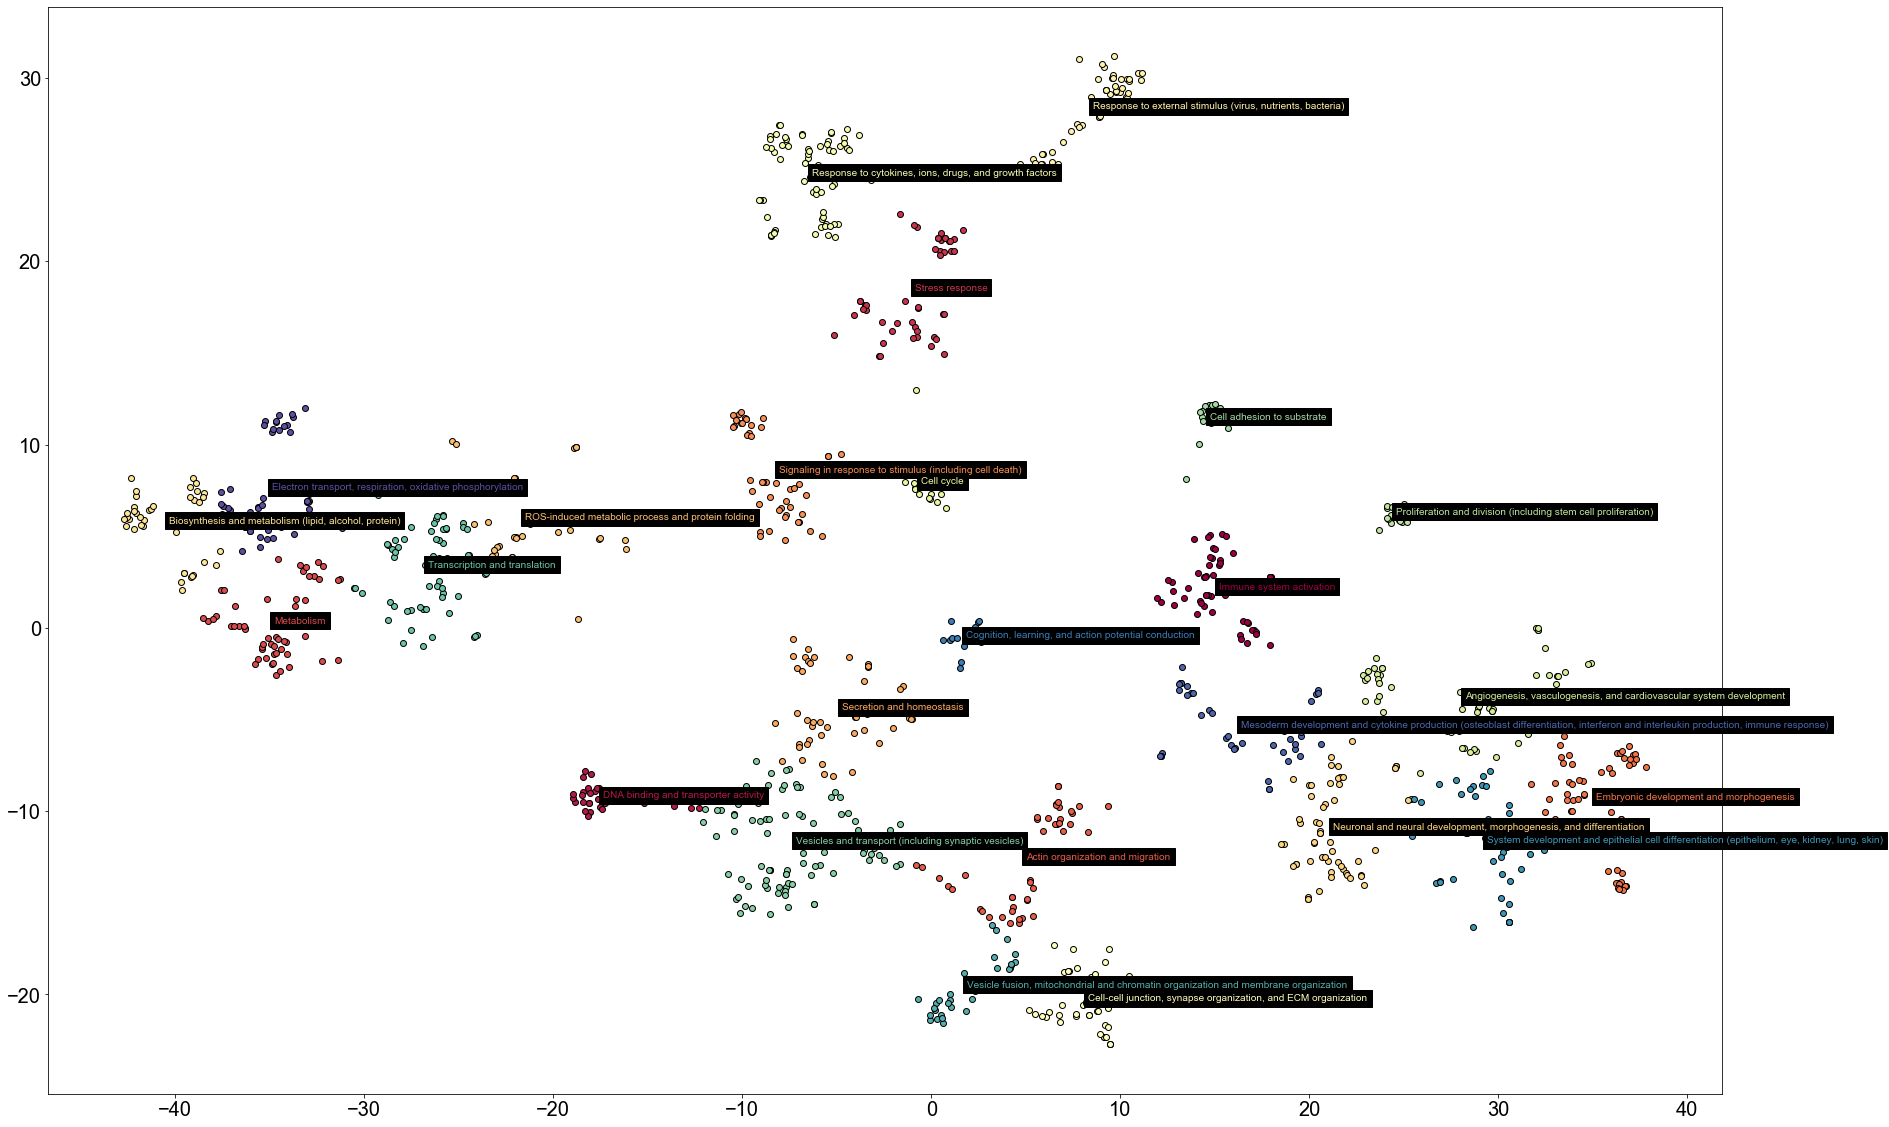

In [282]:
from sklearn.manifold import TSNE, MDS
from sklearn.cluster import AffinityPropagation
import plotly
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
import os.path as op
%matplotlib inline
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.io as pio
import matplotlib
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans


np.random.seed(0)
font = {'weight' : 'normal',
        'family': 'Arial',
        'size'   : 8}

matplotlib.rc('font', **font)

directory = "/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/"

#dissim = 1-pd.read_csv("../dist_all_rel.csv",index_col=0)
dissim = pd.read_csv(op.join(directory, "dist_all_rel_dendrogram_pnec_sclc.csv"),index_col=0)
#dissim = 1-(dissim + dissim.transpose())

dissim = np.multiply(dissim, 1-np.eye(dissim.shape[0]))
dissim = np.power(dissim,6.)

go_phenotypes = pd.read_csv(op.join(directory, "airway_sclc_go_phenotypes.csv"),index_col=0)
go_phenotypes = go_phenotypes.loc[(go_phenotypes['level']>1) & (go_phenotypes['ont']=='BP')]


go_terms_to_keep = [i for i in dissim.index if dissim.loc[i].drop(i).std()>0] # GO terms with 0 distance to all other terms, or 1 distance to all other terms are dropped. The .drop(i) addresses the fact that terms with distance 1 from all others will still have distance 0 to themselves, which must be dropped prior to std
go_terms_to_keep = np.intersect1d(go_terms_to_keep, go_phenotypes.index)
go_phenotypes = go_phenotypes.loc[go_terms_to_keep]


dissim = dissim.loc[go_terms_to_keep, go_terms_to_keep]

t = TSNE(metric="precomputed",random_state=0, n_components = 2)
#t = MDS(dissimilarity="precomputed")
y = t.fit_transform(dissim)

ydf = pd.DataFrame(y, index=dissim.index, columns=['tsne%d'%(i+1) for i in range(t.n_components)])

db = KMeans(n_clusters=25).fit(ydf[['tsne1','tsne2']])
labels = db.labels_
    
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
plt.figure(figsize = (30,20))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    x = ydf.loc[class_member_mask,'tsne1']
    y = ydf.loc[class_member_mask,'tsne2']
#     if k ==9:
#         plt.plot(x, y, 'o', markerfacecolor=tuple(col),
#          markeredgecolor='k', markersize=12)
    plt.plot(x, y, 'o', markerfacecolor=tuple(col),
         markeredgecolor='k', markersize=6)
    plt.text(x.mean(),y.mean(), cluster_dict[k], size = 10, backgroundcolor = 'k', color = tuple(col))
plt.savefig('./out/tsne_airway_sclc_labeled.pdf')
    
bounds = np.zeros((t.n_components,2))
bounds[:,0] = ydf.min(axis=0) - 0.2*(ydf.max(axis=0)-ydf.min(axis=0))
bounds[:,1] = ydf.max(axis=0) + 0.2*(ydf.max(axis=0)-ydf.min(axis=0))

# fig = plt.figure()
# # AP = AffinityPropagation()#preference = preference)
# # AP.fit(ydf)
# ax = fig.add_subplot(111)
# #kernel = density.plot_density(ydf, continuous=True, ax=ax, bounds=bounds[[0,1],:], scatter="all")
# ax.scatter(ydf['tsne1'],ydf['tsne2'],s=1,c='#CCAACC', edgecolor='k', linewidth=0.3)


# if False:
#     top_level_phenotypes = ydf.loc[[ydf.index[xxx] for xxx in AP.cluster_centers_indices_]]
#     top_level_phenotypes['name']=go_phenotypes.loc[top_level_phenotypes.index, 'name']


# #for i, pheno in enumerate(["green", "brown", "blue", "yellow", "turquoise", "black", "red", "midnightblue", "purple", "pink", "salmon"]):
# # for i, pheno in enumerate(["NE",'Basal','Ciliated','Club','Goblet','Ionocyte','Tuft']):
# for i, pheno in enumerate(["SCLC-Y_arc"]):

#     go_terms = go_phenotypes.loc[(go_phenotypes[pheno]) & (go_phenotypes['ont'] == 'BP')].index
#     go_colors = []
#     for i in go_terms:
#         if go_phenotypes.loc[i]['NE'] == True:
#             if go_phenotypes.loc[i][:-3].astype('int').sum() > 2: go_colors.append('lightblue') #if more than just the current subtype and NE share this go term
#             else:
#                 go_colors.append('Blue') #just NE and this subtype share the go term
#         else: go_colors.append("Green") #just this subtype has the go term
#     enrichment = pd.read_csv(op.join(directory,"%s_ontology.tab" % pheno.lower()), delimiter="\t", index_col="term_goid").loc[go_terms]

#     ydf['term'] = pd.Series(['x']*len(ydf.index))
#     for i,r in ydf.iterrows():
#         ydf.loc[i,'term'] = go_phenotypes.loc[i, 'name']
    
#sns.scatterplot(x = ydf.loc[go_terms,'tsne1'],
#             y = ydf.loc[go_terms,'tsne2'],)
       

#     ydfsmall = ydf.loc[go_terms]
#     ydflarge = ydf.drop(go_terms)

#print('static')
# plt.savefig(op.join(directory, "PNEC_space.pdf"))
#raise ValueError("HOK")

In [245]:
ydf['kmeans']=db.labels_

In [247]:
ydf['name'] = df.loc[ydf.index]['name']

In [254]:
df.loc[ydf.loc[ydf['kmeans'] == 9].index]

,NE,Basal,Ciliated,Club,Goblet,Ionocyte,Tuft,SCLC-A_arc,SCLC-A2_arc,SCLC-N_arc,SCLC-P_arc,SCLC-Y_arc,terms,ont,name,level
GO:0000902,1,1,1,1,1,1,1,4.02273e-05,1,2.54784e-05,1,6.77133e-08,NGF; STMN1; ISL1; BCL11B; MAP2; MAP6; SOX6; PT...,BP,cell morphogenesis,4
GO:0000904,1,1,1,1,1,1,1,0.00101687,1,3.96761e-05,1,2.91894e-06,NGF; STMN1; ISL1; BCL11B; MAP2; MAP6; USP33; F...,BP,cell morphogenesis involved in differentiation,5
GO:0003357,0.000199018,1,1,1,1,1,1,0.00740603,1,1,1,1,ASCL1; SOX4; INSM1,BP,noradrenergic neuron differentiation,5
GO:0003358,0.000981888,1,1,1,1,1,1,1,1,1,1,1,ASCL1; INSM1,BP,noradrenergic neuron development,5
GO:0007272,1,1,1,1,1,1,1,1,1,1,1,0.00374796,TGFB1; PMP22; RARG; HEXB; PPARD; MARVELD1; PRX...,BP,ensheathment of neurons,2
GO:0007275,1,6.61187e-09,1,1,1,1,1,0.000126491,0.00944993,1.05323e-06,8.53304e-05,7.94186e-06,ERRFI1; TGM2; DYNLL1; HSPA5; CRLF1; FAM3C; FKB...,BP,multicellular organism development,2
GO:0007399,9.28127e-05,1,1,1,1,1,1,1.03072e-08,1,9.20758e-11,0.00561002,0.00172689,CALR; NGF; IGSF8; KCNC1; HSPA5; CKB; ARL3; IFT...,BP,nervous system development,4
GO:0007411,1,1,1,1,1,1,1,0.000254174,1,1,1,1,SRC; DPYSL5; DPYSL2; PLXNA3; KIF5A; FYN; TUBB3...,BP,axon guidance,4
GO:0007417,1,0.00955342,0.00872263,1,1,1,1,8.93749e-07,1,0.00269416,1,1,BAG3; DYNLL1; HSPA5; LMO4; WLS; WNT4; CD9; SOX...,BP,central nervous system development,4
GO:0007420,1,1,0.0021182,1,1,1,1,1.92145e-06,1,1,1,1,DYNLL1; CKB; ROGDI; ARL6; BOK; HYDIN; PLXNB2; ...,BP,brain development,4


In [237]:
subtypes = df.columns[:-4]
hm = pd.DataFrame(index=set(ydf['kmeans']), columns=subtypes)
for s in subtypes:
    ind, count = np.unique(ydf.loc[set(ydf.index).intersection(set(df[df[f'{s}']!=1].index))]['kmeans'],return_counts=True)
    for i, c in zip(ind,count):
        hm.loc[i,s] = c
        

In [238]:
hm = hm.fillna(0).T/np.unique(ydf['kmeans'], return_counts=True)[1]

In [259]:
hm.columns = [cluster_dict[i] for i in hm.columns]


In [271]:
new_ind = []
for i in hm.index:
    if "_arc" in i:
        new_ind.append(i.split('_')[0])
    else:
        new_ind.append(i)
hm.index = new_ind
        

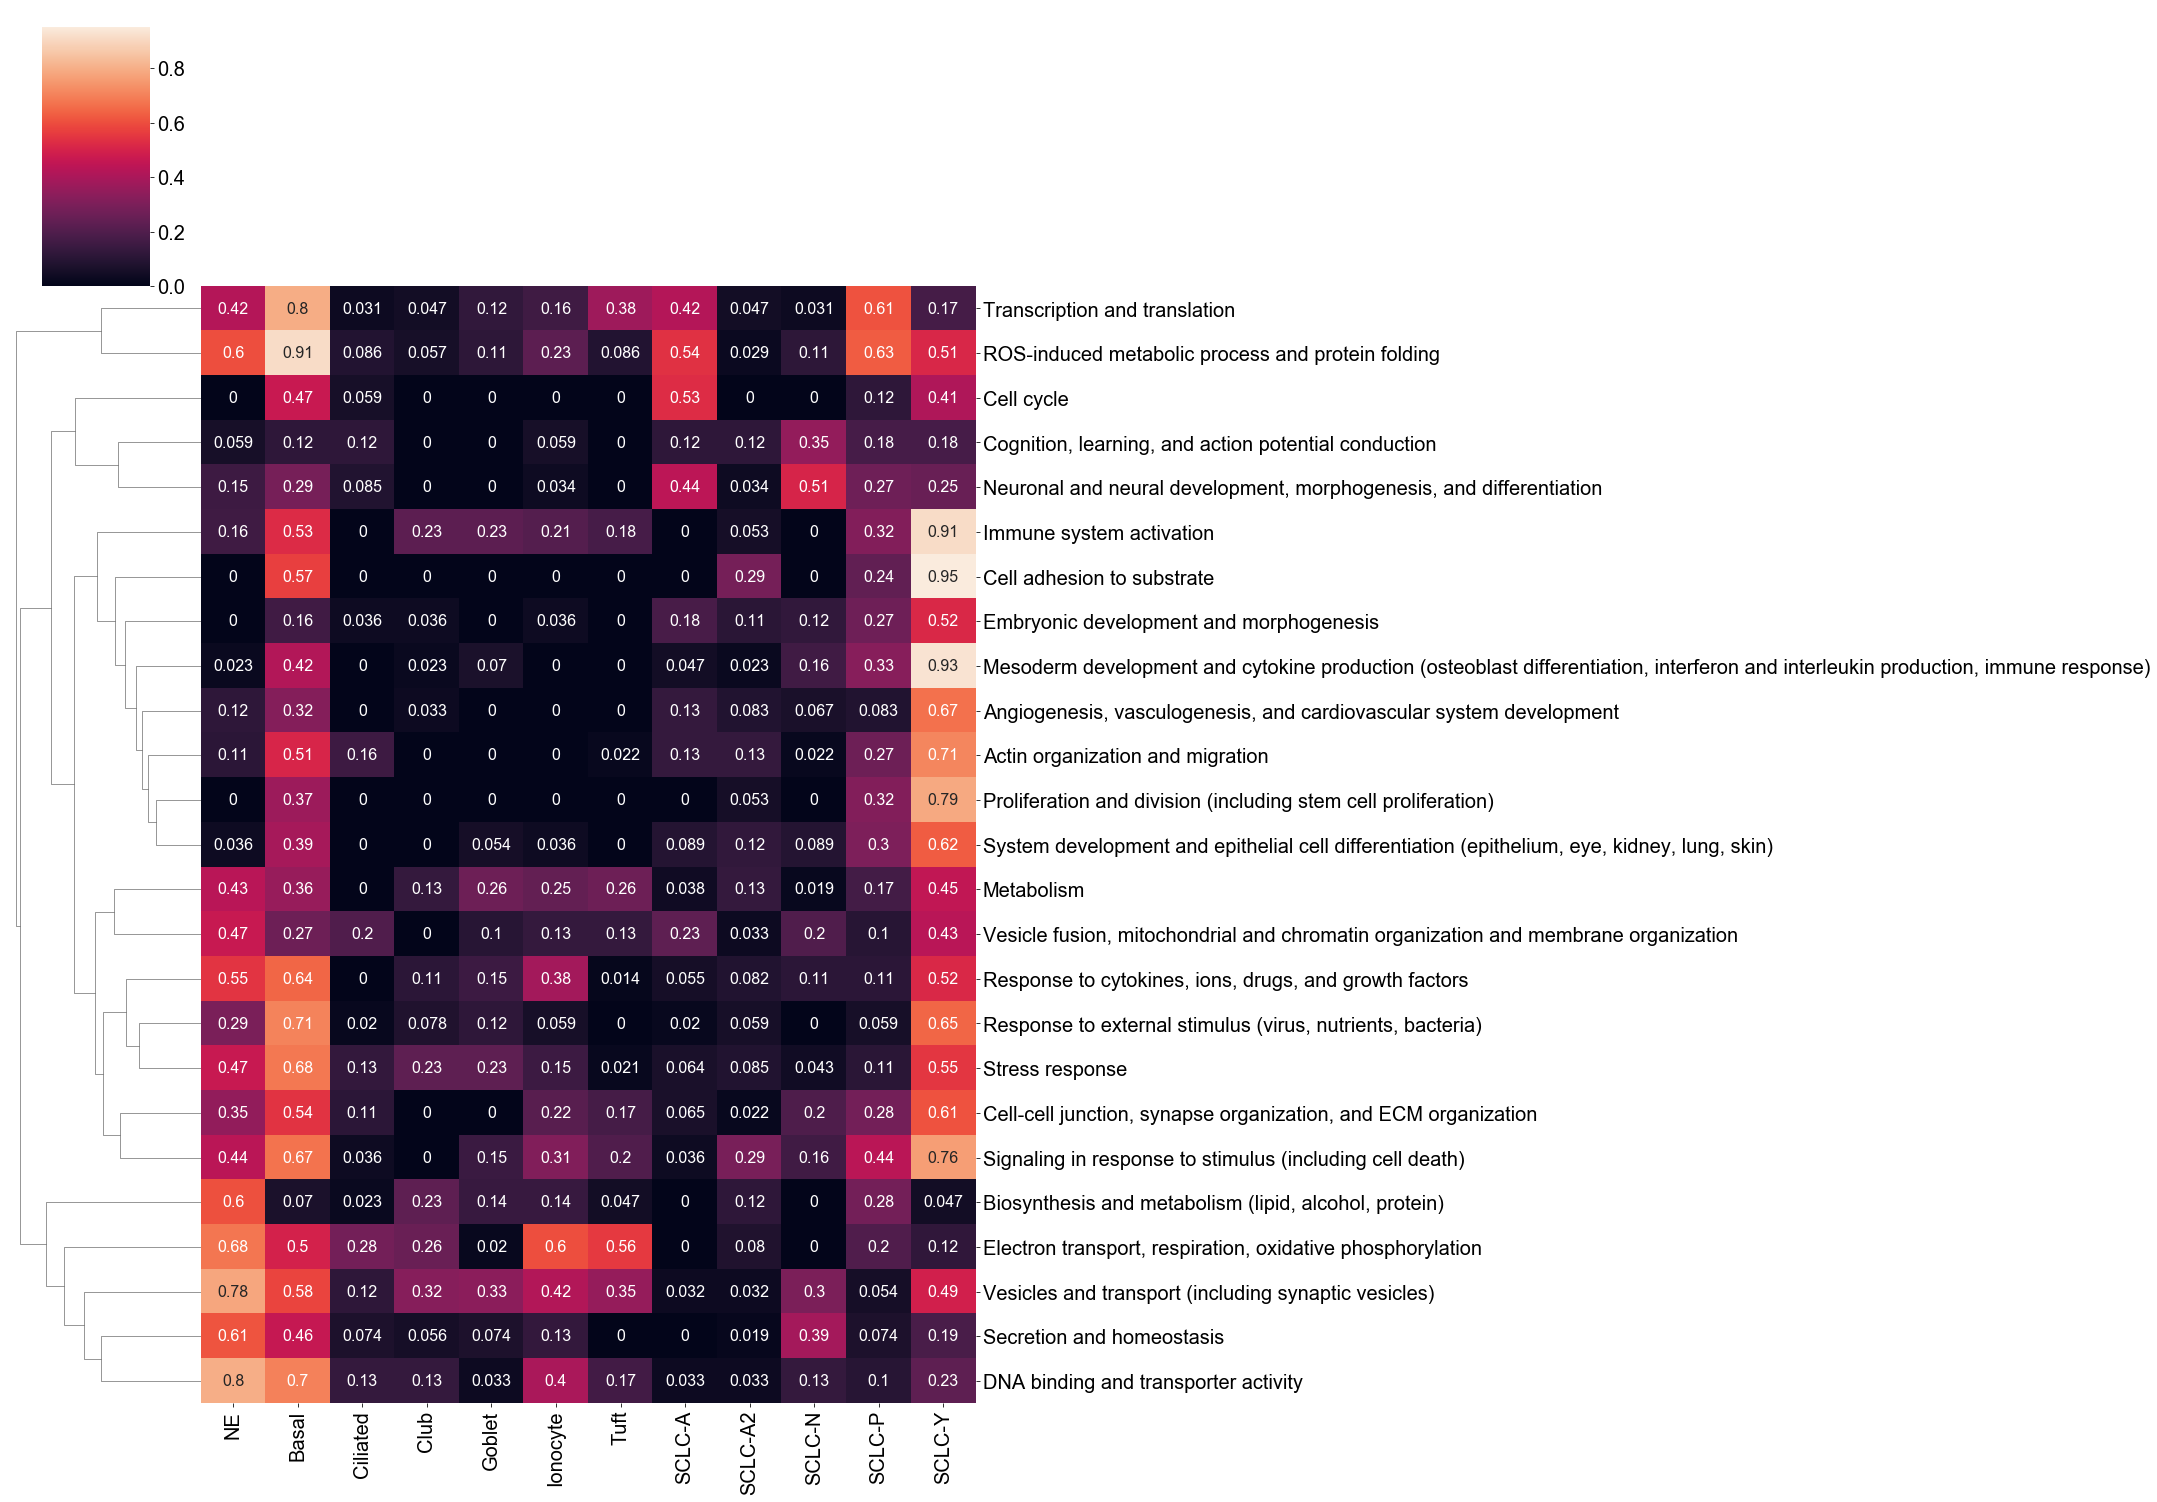

In [279]:
font = {'weight' : 'normal',
        'size'   : 8}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)
b = sns.clustermap(hm.T.sort_values('NE'), annot = True, col_cluster=False, figsize = (30,20), annot_kws = {'size':16})
plt.setp(b.ax_heatmap.get_xticklabels(), rotation=90)
plt.savefig('./out/airway_sclc_clustermap.pdf')

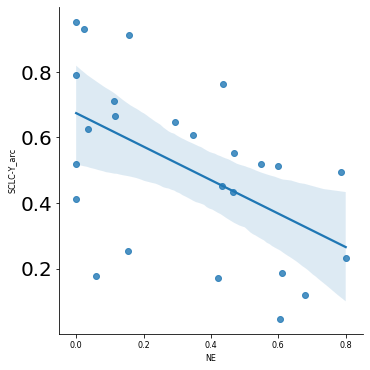

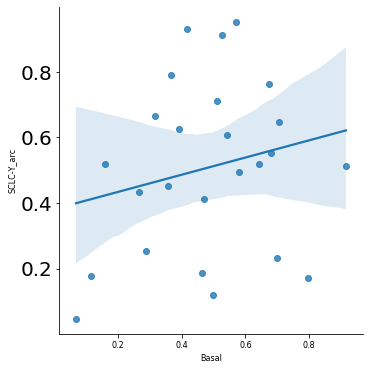

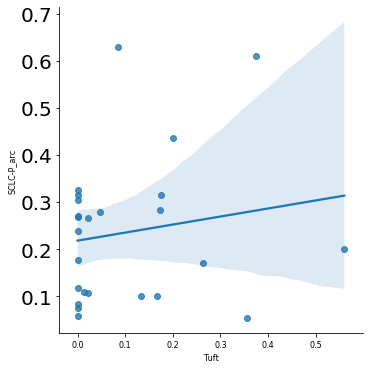

In [236]:
sns.lmplot(data = hm.T, x ='NE',y =  'SCLC-Y_arc', )
sns.lmplot(data = hm.T, x ='Basal',y =  'SCLC-Y_arc')
sns.lmplot(data = hm.T, x ='Tuft',y =  'SCLC-P_arc')

In [215]:
cluster_dict = {0:"Immune system activation",
               1: "DNA binding and transporter activity",
               2: "Stress response",
               3: "Metabolism",
               4: "Actin organization and migration",
               5: "Embryonic development and morphogenesis",
               6: "Signaling in response to stimulus (including cell death)",
               7: "Secretion and homeostasis",
               8: "ROS-induced metabolic process and protein folding",
               9: "Neuronal and neural development, morphogenesis, and differentiation",
               10: "Biosynthesis and metabolism (lipid, alcohol, protein)",
               11: "Response to external stimulus (virus, nutrients, bacteria)",
               12: "Cell-cell junction, synapse organization, and ECM organization",
               13: "Response to cytokines, ions, drugs, and growth factors",
               14: 'Cell cycle',
               15: "Angiogenesis, vasculogenesis, and cardiovascular system development",
               16: "Proliferation and division (including stem cell proliferation)",
               17: "Cell adhesion to substrate",
               18: "Vesicles and transport (including synaptic vesicles)",
               19: "Transcription and translation",
               20: "Vesicle fusion, mitochondrial and chromatin organization and membrane organization",
                21: "System development and epithelial cell differentiation (epithelium, eye, kidney, lung, skin)",
                22: "Cognition, learning, and action potential conduction",
                23: "Mesoderm development and cytokine production (osteoblast differentiation, interferon and interleukin production, immune response)",
                24: "Electron transport, respiration, oxidative phosphorylation"
               }

In [240]:
[print(i) for i in ydf.loc[ydf['kmeans']==9]['name']]

cell morphogenesis
cell morphogenesis involved in differentiation
noradrenergic neuron differentiation
noradrenergic neuron development
ensheathment of neurons
multicellular organism development
nervous system development
axon guidance
central nervous system development
brain development
regulation of cell shape
axon ensheathment
glial cell differentiation
oligodendrocyte development
spinal cord development
dorsal spinal cord development
telencephalon development
nerve development
limbic system development
substantia nigra development
hippocampus development
preganglionic parasympathetic fiber development
cerebral cortex regionalization
central nervous system neuron differentiation
neurogenesis
central nervous system myelination
corpus callosum development
regulation of cell morphogenesis
cell differentiation
neuron differentiation
forebrain development
neuron projection development
axon ensheathment in central nervous system
cellular component morphogenesis
cell part morphogenesis
app

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [77]:
dissim = pd.read_csv("/Users/smgroves/Dropbox (VU Basic Sciences)/SCLC/RNAseq-analysis/GO_maps/PNEC_phenospace/dist_all_rel_dendrogram_pnec_sclc.csv",
                    index_col=0, header = 0)

In [78]:
len(set(dissim.index).intersection(set(NE_go)))

766

In [67]:
NE_go = list(df.loc[df['NE']==True].index)

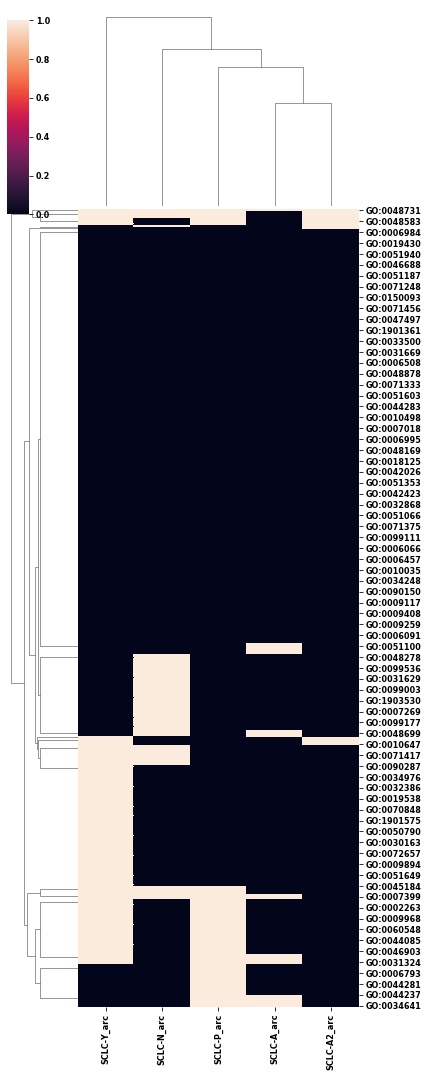

In [131]:
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
# only NE == True:
# dissim_NE=dissim.loc[NE_go][NE_go]
# linkage = hc.linkage(dissim_NE, method='average')
sns.clustermap(df.loc[NE_go][df.columns[7:-3]].astype('int'), figsize = (6,15))

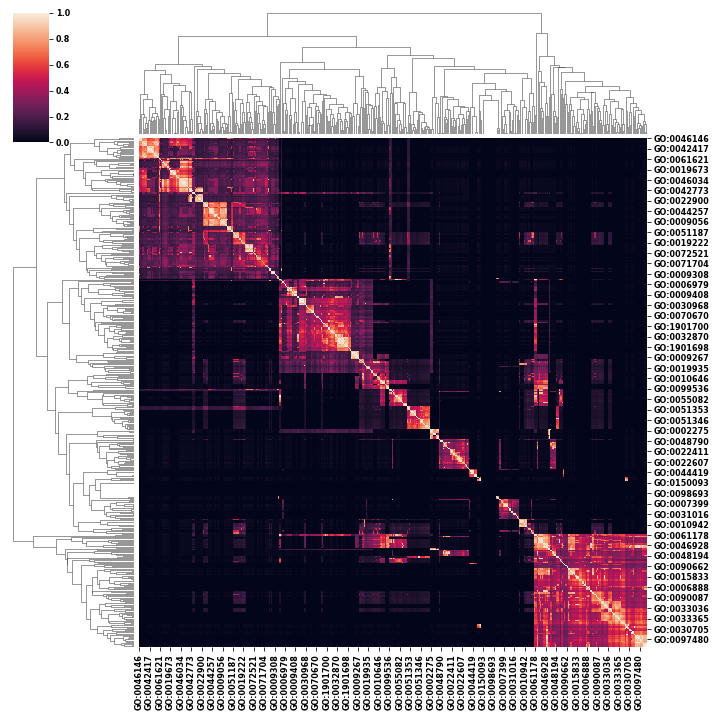

In [132]:
sns.clustermap(1-dissim.loc[NE_go][NE_go])

In [190]:
df.loc[NE_go].loc[df['SCLC-A_arc']!=1].sort_values('SCLC-A_arc').head(40)

,NE,SCLC-A_arc,SCLC-A2_arc,SCLC-N_arc,SCLC-P_arc,SCLC-Y_arc,ont,name,level
GO:0031323,0.00202779,4.00586e-09,1,1,7.06968e-07,1,BP,regulation of cellular metabolic process,4
GO:0007399,9.28127e-05,1.03072e-08,1,9.20758e-11,0.00561002,0.00172689,BP,nervous system development,4
GO:0044271,0.00154339,1.32048e-07,1,1,3.64671e-06,1,BP,cellular nitrogen compound biosynthetic process,4
GO:0050789,0.000964464,1.40248e-07,1,2.91555e-06,0.00063895,0.000266628,BP,regulation of biological process,2
GO:0019222,0.000352191,2.96537e-07,1,1,4.38483e-06,1,BP,regulation of metabolic process,3
GO:0034641,7.7176e-06,7.43444e-06,1,1,1.03452e-06,1,BP,cellular nitrogen compound metabolic process,3
GO:0030182,0.00425068,1.27546e-05,1,2.42639e-06,1,1,BP,neuron differentiation,4
GO:0022008,0.00179173,1.54592e-05,1,1.91801e-06,1,1,BP,neurogenesis,4
GO:0007017,0.000822899,1.60745e-05,1,1,1,1,BP,microtubule-based process,2
GO:0048699,0.00161619,4.47789e-05,1,2.47838e-06,1,1,BP,generation of neurons,5


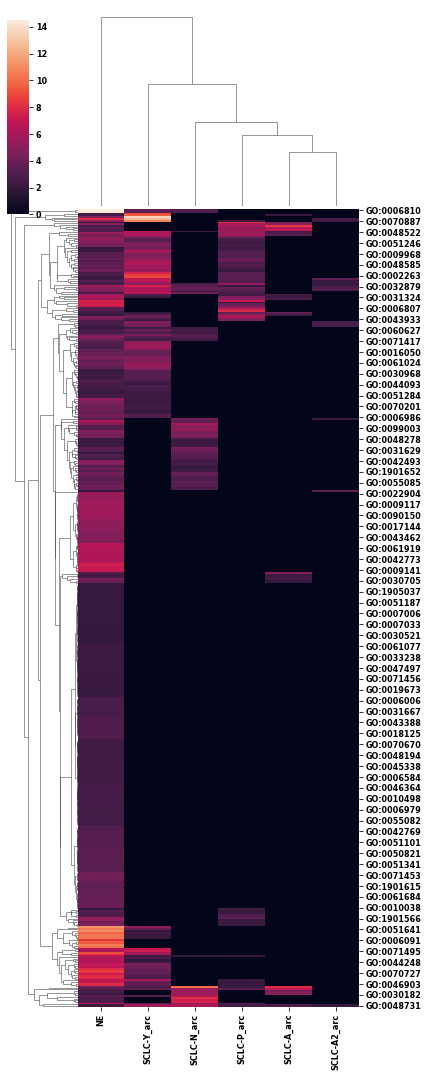

In [209]:
sns.clustermap(-np.log10((df.loc[NE_go][df.columns[:-3]]).astype(float)), figsize = (6,15))

## Using bulk SCLC data and averaged PNEC data with ssGSEA to generate GO term expression values

## Using bulk SCLC data and averaged PNEC data with rank ordered genes by overall expression

Uses GSEA Pre Ranked to give a list of genes (by expression value) as ranking weights

### PNEC rank ordered genes

In [216]:
ne_obs = airway_cluster[airway_cluster['cluster']=='Neuroendocrine'].index

In [224]:
ne_gene_ro = pd.Series(airway[airway.obs['cluster']=='Neuroendocrine'].X.mean(axis = 0), index = airway.var_names)

In [253]:
ne_gene_ro-ne_gene_ro.mean()

XKR4             -0.141385
GM1992           -0.141385
GM37381          -0.141385
RP1              -0.141385
SOX17            -0.141385
                    ...   
AC168977.1       -0.141385
PISD              0.171740
DHRSX             0.152885
VMN2R122         -0.141385
CAAA01147332.1   -0.141385
Length: 27716, dtype: float32

In [239]:
ne_gene_ro.to_csv('ne_genes_rank_ordered.txt',sep = '\t')

In [238]:
# [print(i) for i in ne_gene_ro.sort_values(ascending=False).head(100).index]

### SCLC Archetype rank ordered genes

In [243]:
arc = pd.read_csv(op.join(outdir, 'arc_space/arc_gene_space_no_lowgenes.csv'), header = None)
arc.columns = data.columns
arc = arc.T

In [245]:
arc.to_csv('archetypes_genes_rank_ordered.rnk', sep = '\t')

In [258]:
for i,p in zip(range(5), ['Y','P','N','A2','A']):
    arc[i].to_csv(f'{p}_genes_rank_ordered.rnk', sep = '\t')

## Using single cell data and upregulated genes from rank_genes_groups